In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

Mounted at /content/drive


In [3]:
# Load model for feature extraction
model = Xception(weights='imagenet', include_top=False)


83683744/83683744 [==============================] - 1s 0us/step


In [4]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [5]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 189ms/step


In [6]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 196ms/step


In [7]:
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()

Training Decision Tree with linear kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
F1 Score: 1.0



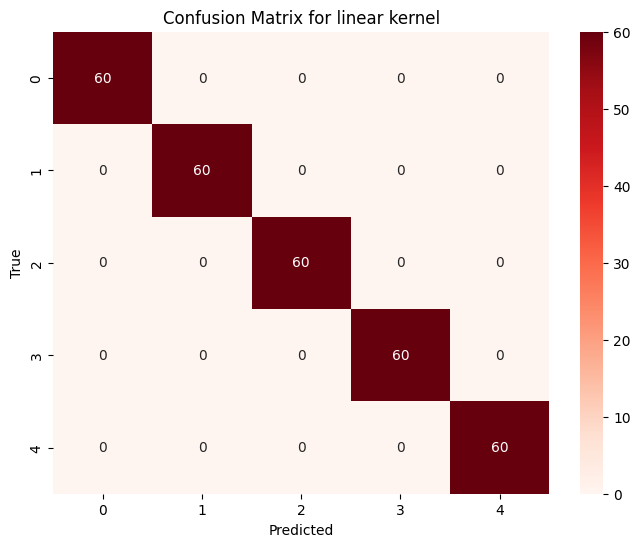

Training Decision Tree with poly kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
F1 Score: 1.0



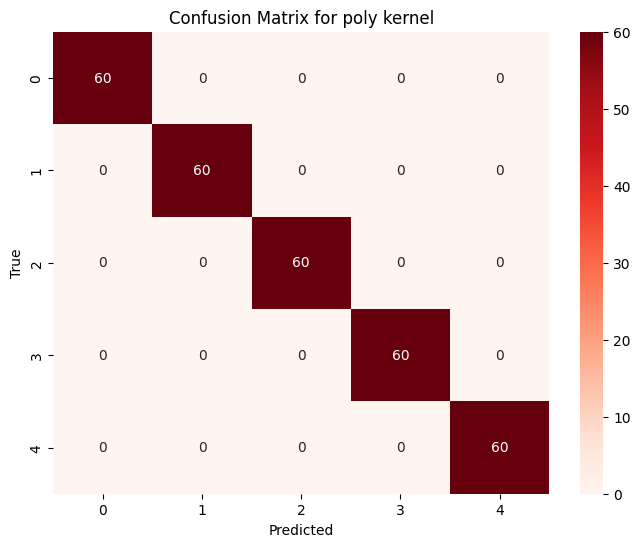

Training Decision Tree with rbf kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
F1 Score: 1.0



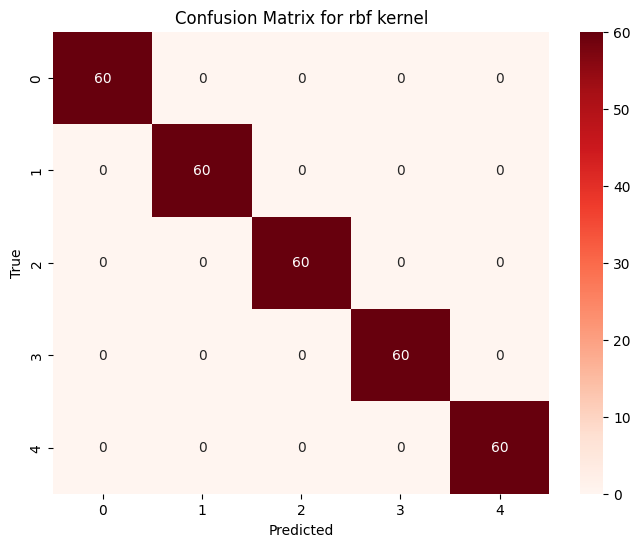

Training Decision Tree with sigmoid kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
F1 Score: 1.0



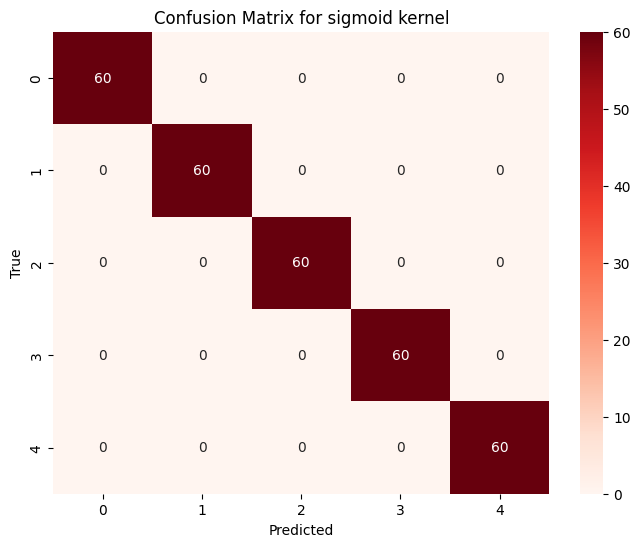

Training Decision Tree with polynomial_exponential kernel...
Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.0
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
F1 Score: 1.0



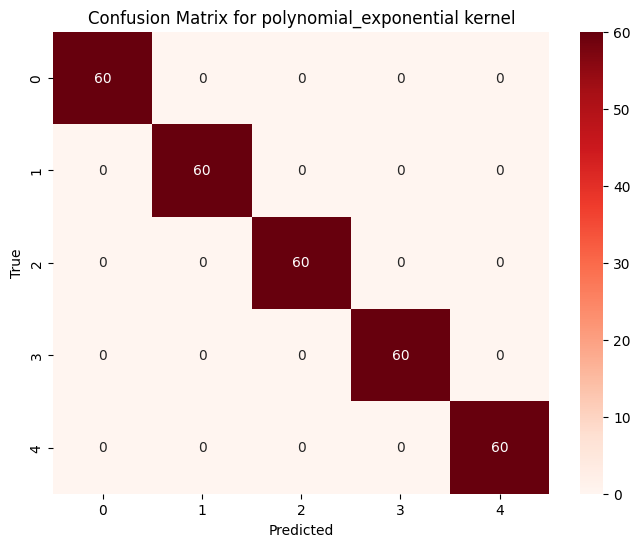

Note: Scikit-learn's DecisionTreeClassifier uses the CART (Classification and Regression Trees) algorithm by default.


In [8]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt  # Importing plt from Matplotlib

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining Decision Tree with {kernel} kernel...\033[0m")

    # Flatten the features for training
    x_train_flat = np.array([feature.flatten() for feature in x_train])

    # Flatten the features for testing
    x_test_flat = np.array([feature.flatten() for feature in x_test])

    # Train Decision Tree classifier
    if kernel == 'polynomial_exponential':
        # For polynomial_exponential kernel, we'll use a regular Decision Tree
        clf = DecisionTreeClassifier()
        clf.fit(x_train_flat, y_train)
    else:
        # For other kernels, we'll use Decision Trees directly
        clf = DecisionTreeClassifier()
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    specificity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity (Recall): {sensitivity}')
    print(f'Specificity: {specificity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    import seaborn as sns

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()

print("\033[1mNote:\033[0m Scikit-learn's DecisionTreeClassifier uses the CART (Classification and Regression Trees) algorithm by default.")
